#Install and Import Libraries

In [14]:
# Install required libraries if not already available
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost --quiet

# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

# Set plotting style and random seed for reproducibility
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

#Download and Load the Dataset

In [15]:
# Download the dataset using kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

# List files in the downloaded directory to confirm
print("\nFiles in the dataset directory:")
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

# Load the main CSV file (creditcard.csv)
csv_path = os.path.join(path, "creditcard.csv")
df = pd.read_csv(csv_path)

# Display basic information
print("\nDataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset info:")
df.info()

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud

Files in the dataset directory:
/kaggle/input/creditcardfraud/creditcard.csv

Dataset shape: (284807, 31)

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


#Initial Data Overview

In [16]:
# Display statistical summary of the dataset
print("\nStatistical summary:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum().sum())  # Total missing values
print(df.isnull().sum())        # Per column


Statistical summary:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Missing values per column:
0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#Class Distribution and Imbalance Visualization


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Class percentages:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


/tmp/ipython-input-711442408.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


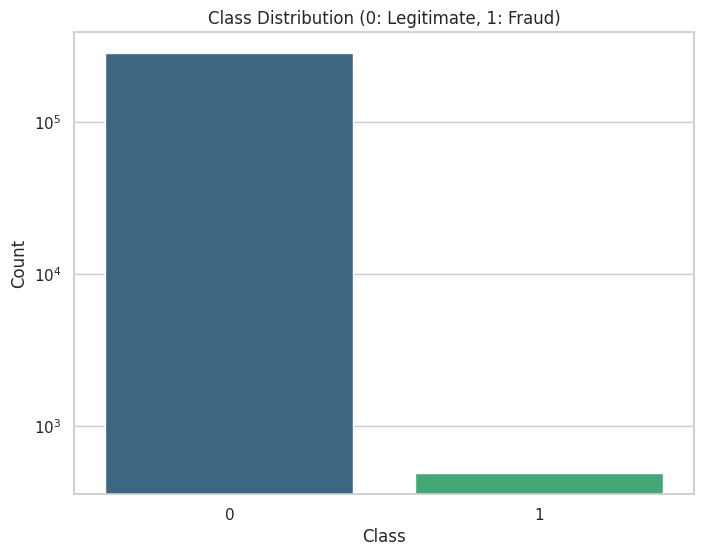

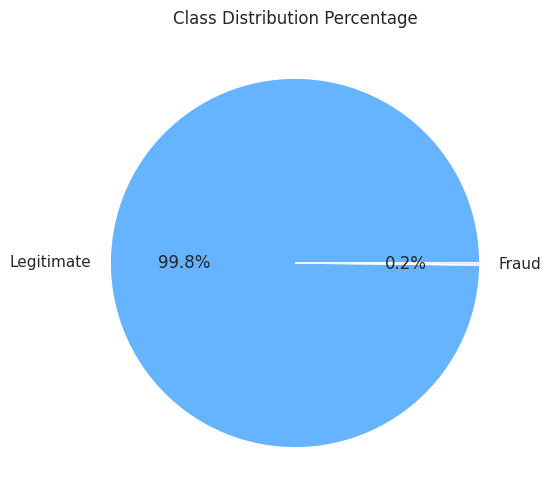

In [17]:
# Calculate class distribution
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("\nClass distribution:")
print(class_counts)
print("\nClass percentages:")
print(class_percentages)

# Visualize class imbalance with a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')  # Log scale to better visualize imbalance
plt.show()

# Pie chart for percentages
plt.figure(figsize=(8, 6))
plt.pie(class_percentages, labels=['Legitimate', 'Fraud'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Class Distribution Percentage')
plt.show()

#Distribution of Key Features (Amount and Time)

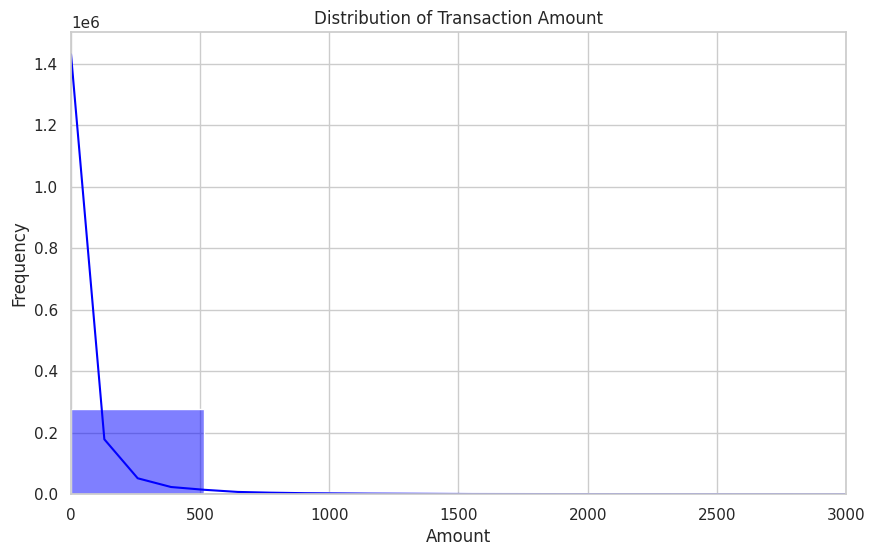

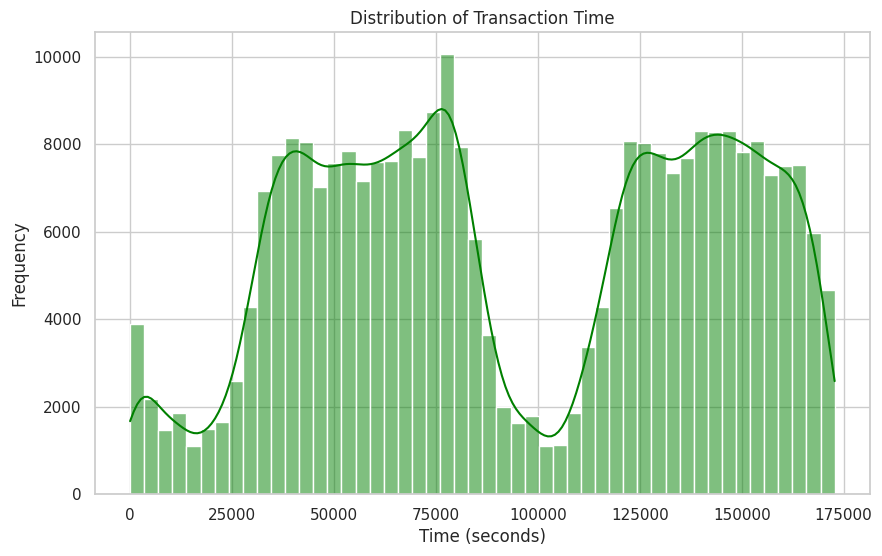

In [18]:
# Histogram for Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, 3000)  # Limit x-axis to focus on common amounts
plt.show()

# Histogram for Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

#Boxplots for Amount by Class and Outlier Detection

/tmp/ipython-input-1188340192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')


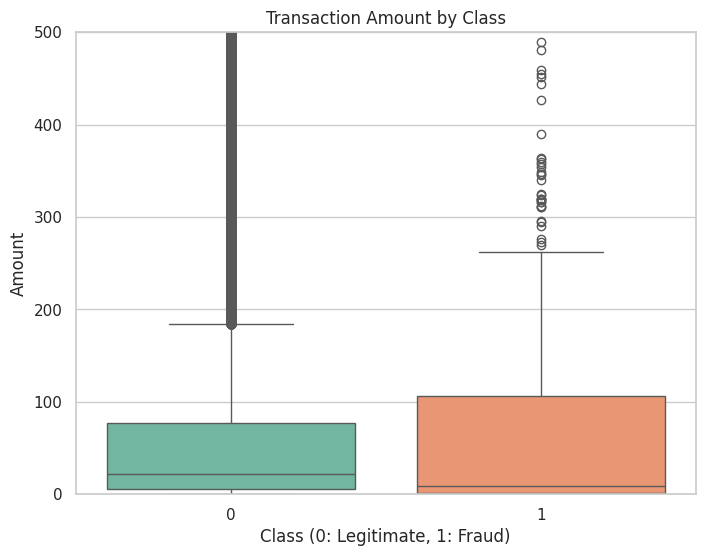

In [19]:
# Boxplot for Amount by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')
plt.title('Transaction Amount by Class')
plt.ylim(0, 500)  # Limit y-axis to focus on typical amounts (frauds often smaller)
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Amount')
plt.show()

#Correlation Heatmap

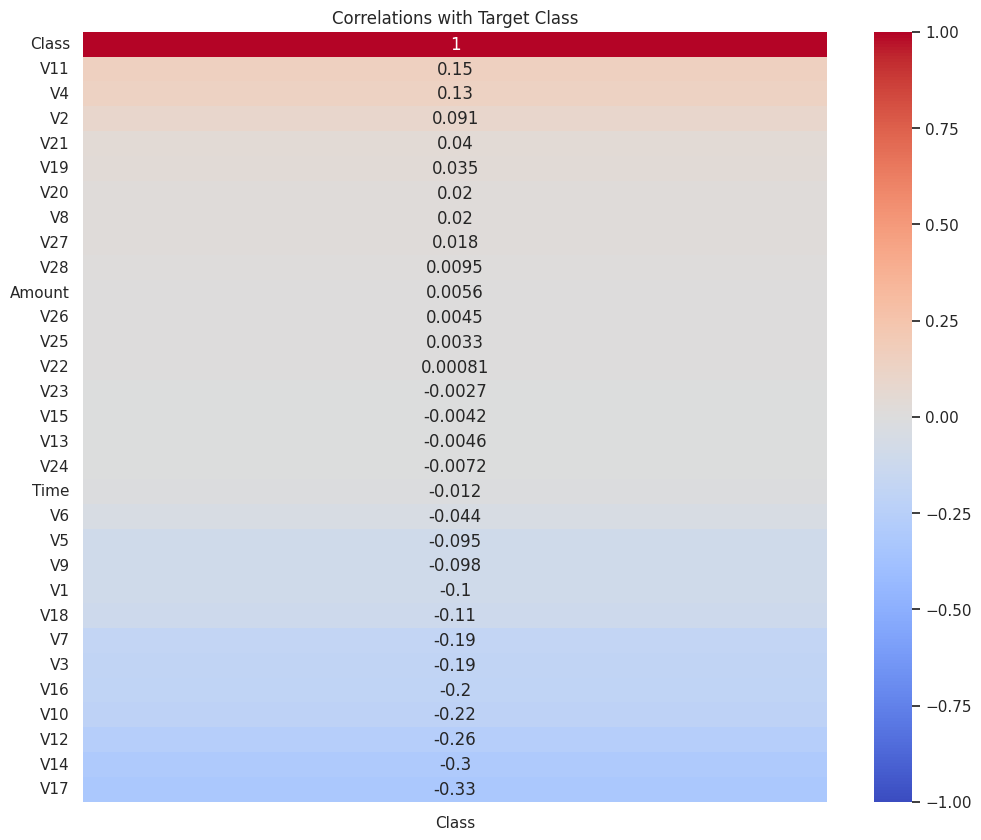

In [20]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlation heatmap (focus on correlations with Class)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations with Target Class')
plt.show()

# Full heatmap if needed (but it's large)
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title('Full Feature Correlation Heatmap')
# plt.show()

#Prepare Features and Target + Train-Test Split

In [21]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split with stratification to maintain class ratio in test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Print shapes and class distribution in train/test
print("Original training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

print("\nClass distribution in training set (before sampling):")
print(y_train.value_counts(normalize=True) * 100)

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True) * 100)

Original training set shape: (227845, 30)
Test set shape: (56962, 30)

Class distribution in training set (before sampling):
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

Class distribution in test set:
Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


#Apply Sampling Techniques and Visualize Results

1. Before Sampling


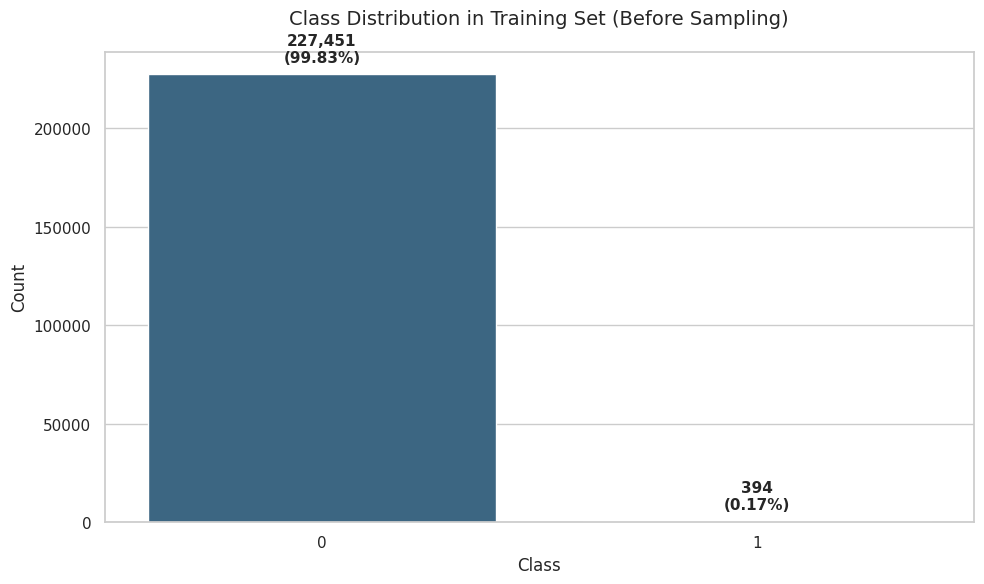



2. After Random Undersampling


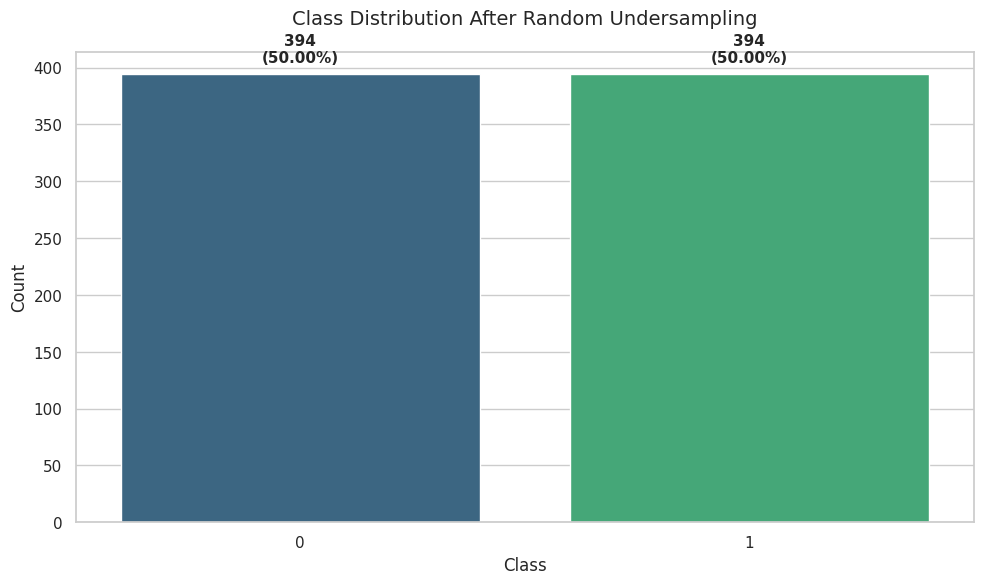



3. After Random Oversampling


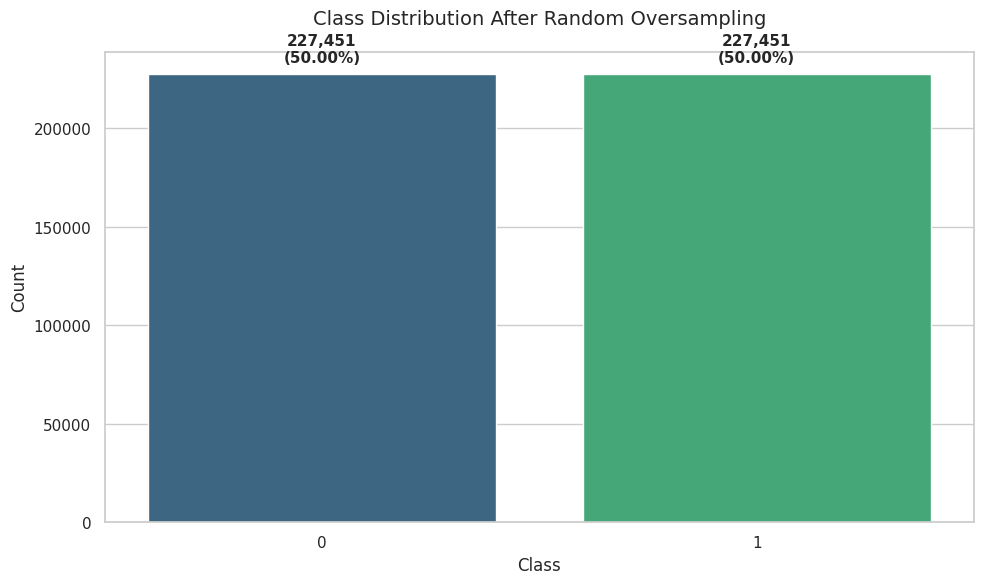



4. After SMOTE


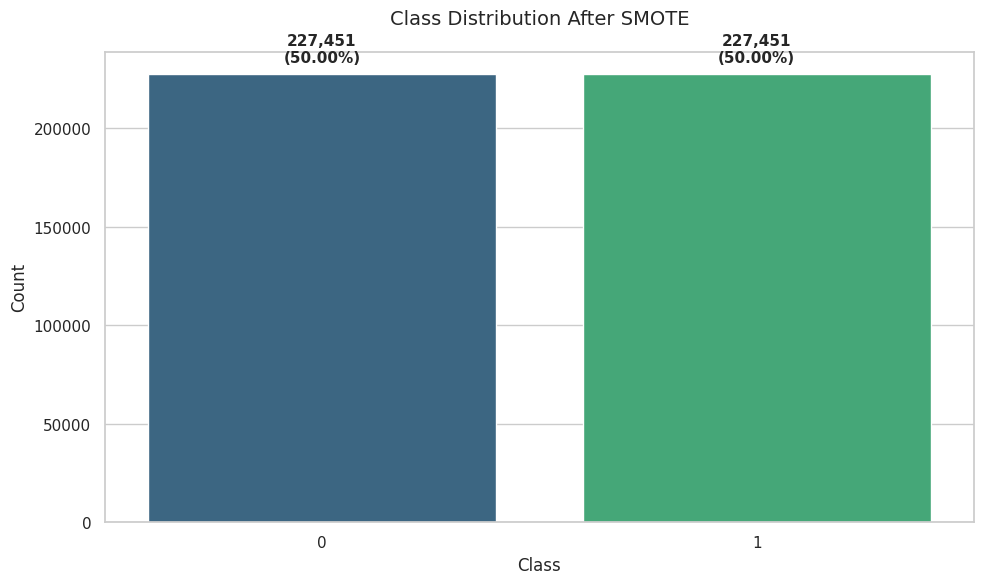

In [22]:
# Improved function to plot class distribution with better spacing
def plot_class_distribution(y, title):
    counts = pd.Series(y).value_counts().sort_index()
    percentages = pd.Series(y).value_counts(normalize=True).sort_index() * 100

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis', legend=False)

    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Add count and percentage labels on top of bars
    for i, (count, perc) in enumerate(zip(counts.values, percentages.values)):
        plt.text(i, count + max(counts)/50, f'{count:,}\n({perc:.2f}%)',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Add some space at the top
    plt.show()

    # Print a blank line for extra visual separation in notebook output
    print("\n" + "="*60 + "\n")


# Original training distribution
print("1. Before Sampling")
plot_class_distribution(y_train, 'Class Distribution in Training Set (Before Sampling)')

# 1. Random Undersampling
print("2. After Random Undersampling")
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
plot_class_distribution(y_rus, 'Class Distribution After Random Undersampling')

# 2. Random Oversampling
print("3. After Random Oversampling")
ros = RandomOverSampler(random_state=RANDOM_STATE)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
plot_class_distribution(y_ros, 'Class Distribution After Random Oversampling')

# 3. SMOTE
print("4. After SMOTE")
smote = SMOTE(random_state=RANDOM_STATE)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
plot_class_distribution(y_smote, 'Class Distribution After SMOTE')

#Summary of Sampling Results

In [23]:
# Print sizes after sampling
print("Dataset sizes after sampling:")
print(f"Original training:     {len(X_train)} samples")
print(f"Undersampling:         {len(X_rus)} samples ({len(X_rus)/len(X_train)*100:.1f}%)")
print(f"Oversampling:          {len(X_ros)} samples ({len(X_ros)/len(X_train)*100:.1f}%)")
print(f"SMOTE:                 {len(X_smote)} samples ({len(X_smote)/len(X_train)*100:.1f}%)")

Dataset sizes after sampling:
Original training:     227845 samples
Undersampling:         788 samples (0.3%)
Oversampling:          454902 samples (199.7%)
SMOTE:                 454902 samples (199.7%)


#Model Training - Random Forest and XGBoost

In [24]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import joblib

# We'll use the SMOTE-resampled training data
X_train_res = X_smote
y_train_res = y_smote

print("Training models on SMOTE-resampled data...")
print(f"Training samples: {len(X_train_res)} (balanced)\n")

# 1. Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',  # Extra safety, though data is already balanced
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf_model.fit(X_train_res, y_train_res)
print("Random Forest training completed.\n")

# 2. XGBoost
print("Training XGBoost...")
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    eval_metric='auc'
)
xgb_model.fit(X_train_res, y_train_res)
print("XGBoost training completed.\n")

Training models on SMOTE-resampled data...
Training samples: 454902 (balanced)

Training Random Forest...
Random Forest training completed.

Training XGBoost...
XGBoost training completed.



#Predictions and Evaluation Function


Random Forest Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9644


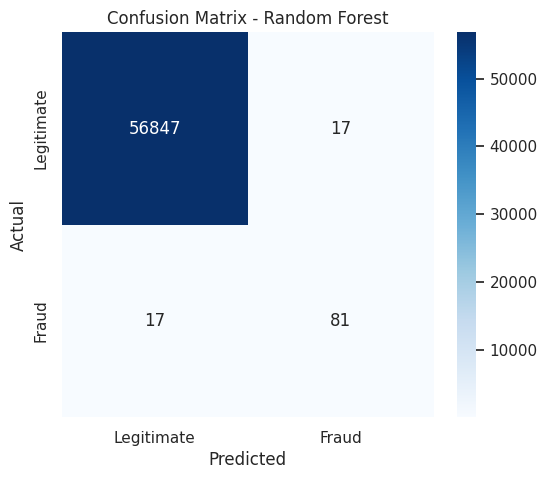


XGBoost Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.87      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.93      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9775


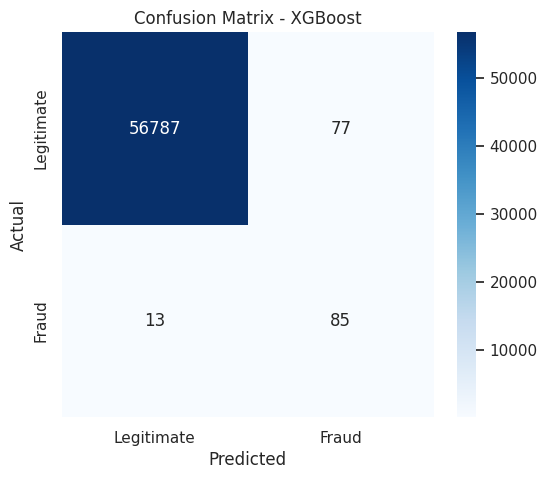

In [25]:
# Make predictions on the original (unseen) test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n{model_name} Performance on Test Set:")
    print(classification_report(y_true, y_pred))

    auc = roc_auc_score(y_true, y_proba)
    print(f"ROC-AUC Score: {auc:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb, "XGBoost")

#ROC and Precision-Recall Curves Comparison

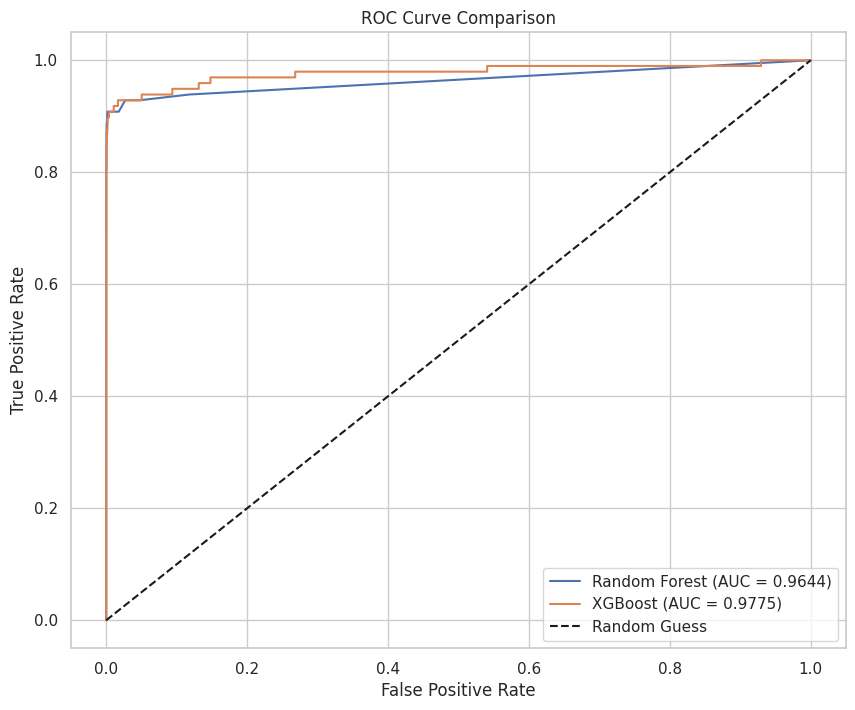

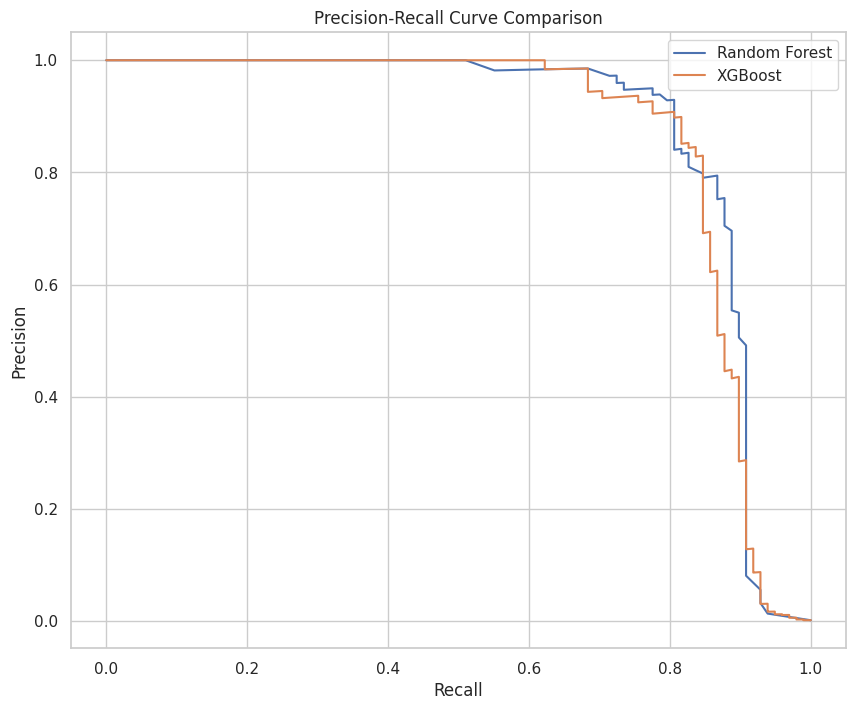

In [26]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_pred_proba_xgb):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 8))
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)

plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

#Summary Comparison Table

In [27]:
# Final comparison table
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Precision (Fraud)': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall (Fraud)': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1-Score (Fraud)': [
        2 * precision_score(y_test, y_pred_rf) * recall_score(y_test, y_pred_rf) /
        (precision_score(y_test, y_pred_rf) + recall_score(y_test, y_pred_rf)),
        2 * precision_score(y_test, y_pred_xgb) * recall_score(y_test, y_pred_xgb) /
        (precision_score(y_test, y_pred_xgb) + recall_score(y_test, y_pred_xgb))
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_xgb)
    ]
})

results = results.round(4)
print("\nModel Comparison Summary:")
display(results.sort_values(by='ROC-AUC', ascending=False))


Model Comparison Summary:


,Model,Precision (Fraud),Recall (Fraud),F1-Score (Fraud),ROC-AUC
1,XGBoost,0.5247,0.8673,0.6538,0.9775
0,Random Forest,0.8265,0.8265,0.8265,0.9644


#Precision-Recall Trade-off Analysis (XGBoost)

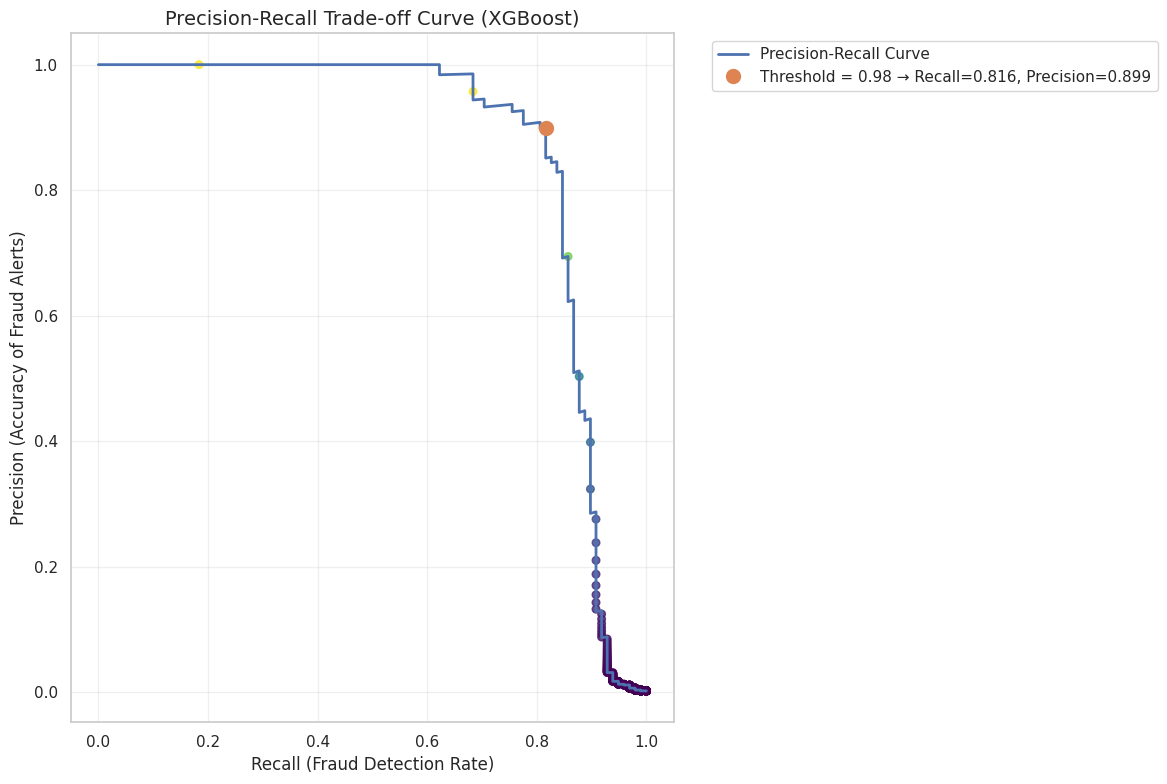


Performance at Different Decision Thresholds (XGBoost):

Threshold  Precision  Recall     F1-Score   Fraud Detected  False Alarms
---------------------------------------------------------------------------
0.30       0.351      0.898      0.504      88              163
0.40       0.433      0.898      0.585      88              115
0.50       0.525      0.867      0.654      85              77
0.98       0.899      0.816      0.856      80              9
0.60       0.567      0.867      0.685      85              65
0.70       0.636      0.857      0.730      84              48

Best F1-Score at threshold = 0.983 → F1 = 0.8556


In [28]:
# Precision-Recall Curve with Threshold Markers
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find threshold that maximizes F1
best_f1_idx = np.argmax(f1_scores)
best_threshold_f1 = thresholds[best_f1_idx]

# Common business thresholds
threshold_options = [0.3, 0.4, 0.5, best_threshold_f1, 0.6, 0.7]
results_thresh = []

plt.figure(figsize=(12, 8))
plt.plot(recall, precision, label='Precision-Recall Curve', linewidth=2)
plt.scatter(recall[::50], precision[::50], c=thresholds[::50], cmap='viridis', s=30, alpha=0.8)

for thresh in threshold_options:
    if thresh in thresholds:
        idx = np.where(thresholds >= thresh)[0][0]
        plt.plot(recall[idx], precision[idx], 'o', markersize=10,
                 label=f'Threshold = {thresh:.2f} → Recall={recall[idx]:.3f}, Precision={precision[idx]:.3f}')

plt.xlabel('Recall (Fraud Detection Rate)', fontsize=12)
plt.ylabel('Precision (Accuracy of Fraud Alerts)', fontsize=12)
plt.title('Precision-Recall Trade-off Curve (XGBoost)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evaluate at different thresholds
print("\nPerformance at Different Decision Thresholds (XGBoost):\n")
print(f"{'Threshold':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Fraud Detected':<15} {'False Alarms'}")
print("-" * 75)

for thresh in threshold_options:
    if thresh <= thresholds[-1]:
        y_pred_thresh = (y_pred_proba_xgb >= thresh).astype(int)
        p = precision_score(y_test, y_pred_thresh)
        r = recall_score(y_test, y_pred_thresh)
        f1 = 2 * p * r / (p + r + 1e-8)
        fraud_detected = (y_pred_thresh[y_test == 1] == 1).sum()
        false_alarms = (y_pred_thresh[y_test == 0] == 1).sum()

        results_thresh.append([thresh, p, r, f1, fraud_detected, false_alarms])

        print(f"{thresh:<10.2f} {p:<10.3f} {r:<10.3f} {f1:<10.3f} {fraud_detected:<15} {false_alarms}")

# Best F1 threshold highlight
print(f"\nBest F1-Score at threshold = {best_threshold_f1:.3f} → F1 = {f1_scores[best_f1_idx]:.4f}")

#Save the Final Model

In [29]:
# Save the best model (XGBoost) and test data info
joblib.dump(xgb_model, 'xgb_fraud_model.pkl')
joblib.dump(X_test.columns.tolist(), 'feature_names.pkl')  # Save feature order

print("XGBoost model saved as 'xgb_fraud_model.pkl'")
print("Feature names saved as 'feature_names.pkl'")
print("Model is ready for deployment in Streamlit!")

XGBoost model saved as 'xgb_fraud_model.pkl'
Feature names saved as 'feature_names.pkl'
Model is ready for deployment in Streamlit!


#Download Models

In [30]:
from google.colab import files

# Download the saved model and features
files.download('xgb_fraud_model.pkl')
files.download('feature_names.pkl')

print("Download the two files to your local machine.")
print("We'll use them in the Streamlit app.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download the two files to your local machine.
We'll use them in the Streamlit app.


# Business Recommendations and Decision Threshold Analysis
"""
Based on the XGBoost model's performance on the unseen test set (98 fraud cases),
we evaluated different probability thresholds to balance the key trade-off in
credit card fraud detection:

- High Recall: Maximize detection of fraudulent transactions to minimize financial losses.
- High Precision: Minimize false positives to avoid unnecessarily blocking or
  inconveniencing legitimate customers.

Key metrics from the threshold analysis:

Threshold | Precision | Recall  | F1-Score | Fraud Detected (out of 98) | False Alarms
----------|-----------|---------|----------|----------------------------|-------------
0.30      | 0.351     | 0.898   | 0.504    | 88                         | 163
0.40      | 0.433     | 0.898   | 0.585    | 88                         | 115
0.50      | 0.525     | 0.867   | 0.654    | 85                         | 77
0.60      | 0.567     | 0.867   | 0.685    | 85                         | 65
0.70      | 0.636     | 0.857   | 0.730    | 84                         | 48
0.98      | 0.899     | 0.816   | 0.856    | 80                         | 9

Business Recommendations:

1. High-Risk Environment (Financial loss is the primary concern)
   - Recommended threshold: 0.40
   - Rationale: Captures 88 out of 98 fraud cases (89.8% recall) while keeping
     false alarms at 115 — an acceptable trade-off when the cost of missing
     a fraudulent transaction is very high (e.g., large banks, high-value transactions).

2. Customer-Centric Environment (Customer experience is prioritized)
   - Recommended threshold: 0.70
   - Rationale: Achieves 63.6% precision with only 48 false alarms, significantly
     reducing unnecessary friction for legitimate customers. Still detects 84 out
     of 98 fraud cases (85.7% recall) — a strong protection level with minimal disruption.

3. Balanced Approach (Recommended for most real-world deployments)
   - Recommended threshold: 0.50 (default)
   - Rationale: Provides a solid compromise with 86.7% recall (85 fraud cases detected)
     and 52.5% precision (77 false alarms). This is suitable for organizations seeking
     effective fraud prevention without overly aggressive flagging of legitimate transactions.

The optimal threshold ultimately depends on the organization's risk appetite,
average transaction value, fraud loss rates, and customer retention costs.
In production, continuous monitoring and periodic threshold recalibration
based on evolving fraud patterns is strongly advised.
"""